In [14]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
import torch

from pepsflow.iPEPS_trainer import iPEPSTrainer
from pepsflow.models.observables import Observables

In [15]:
lambda_values = [lam for lam in np.arange(2.5, 3.2, 0.05)]

chi = 4
d_vals = [2,3, 4]
for d in d_vals:
    trainer = iPEPSTrainer(chi = chi, d = d, gpu=False)
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 10, max_iter=10)
    trainer.save_data(fn = f"increasing_d/d{d}")

 20%|██        | 3/15 [00:43<03:01, 15.11s/it]

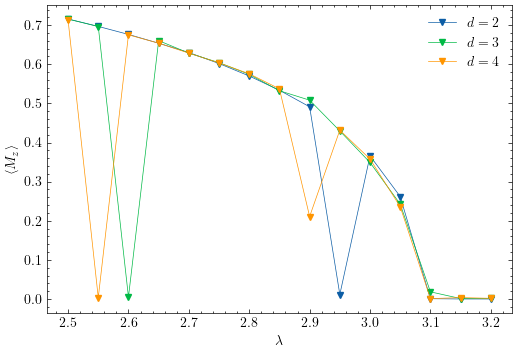

In [11]:
plt.figure(figsize=(6, 4))


for d in [2, 3, 4]:
   
    data = torch.load(f"data/increasing_d/d{d}.pth", weights_only=False)
    lambda_values = data.keys()
    Mz, energies, xi = [], [], []
    for lam in lambda_values:
        E, C, T = data[lam].forward()
        A = data[lam].params[data[lam].map]
        energies.append(E.detach().cpu().numpy())
        Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))
        xi.append(Observables.xi(T.detach()))

    plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5, label = f"$d={d}$")

plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()

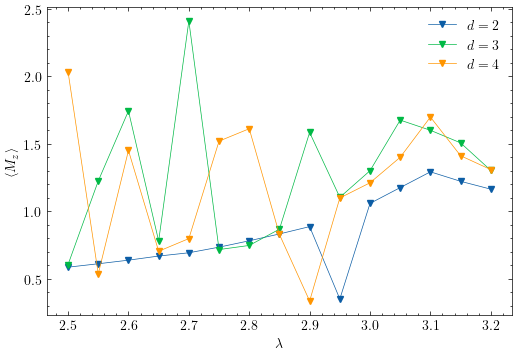

In [12]:
plt.figure(figsize=(6, 4))


for d in [2, 3, 4]:
   
    data = torch.load(f"data/increasing_d/d{d}.pth", weights_only=False)
    lambda_values = data.keys()
    Mz, energies, xi = [], [], []
    for lam in lambda_values:
        E, C, T = data[lam].forward()
        A = data[lam].params[data[lam].map]
        energies.append(E.detach().cpu().numpy())
        Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))
        xi.append(Observables.xi(T.detach()))

    plt.plot(lambda_values, xi, 'v-', markersize=4, linewidth=0.5, label = f"$d={d}$")

plt.legend()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\chi$")
plt.show()